In [42]:
# import libraries
import torch
from torch_geometric.nn import GCNConv, ChebConv, GATConv, RGCNConv # , DCRNNConv
from torch_geometric.data import Data, DataLoader # , temporal_signal_split

from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
import numpy as np
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt


# Create graph rep using network x from adjacency matrix

In [7]:
# Load statics for wing disc geometries

folder_path = r"C:\Users\steph\Box\ZartmanLabGroupFolder\Zartman_Dowling\Stephen\MC2021_Data" 
disc_vertices = np.load(os.path.join(folder_path, "geometry", "disc_vertices.npy"), allow_pickle=True).item()  # Vertices
disc_laplacians = np.load(os.path.join(folder_path, "geometry", "disc_sizes_laplacian.npy"), allow_pickle=True).item()  # Laplacian Matrix
disc_adjs = np.load(os.path.join(folder_path, "geometry", "disc_sizes_adj.npy"), allow_pickle=True).item()  # Adjacency matrix


In [58]:
sizes = ['xsmall', 'small', 'medium', 'large']
size = sizes[0]  # Change index to change size


adj_matrix = disc_adjs[size]
lap_matrix = disc_laplacians[size]
vertices = disc_vertices[size]

display(vertices)

# print(f"Adjacency matrix for {size} disc has shape: \n{adj_matrix.shape}")

# # Get degree matrix
# degree_matrix = lap_matrix + adj_matrix  # D = L + A
# print(f"Degree matrix for {size} disc has shape: \n{degree_matrix.shape}")

# degree_matrix_lap = np.diag(lap_matrix)

# print(degree_matrix)
# print(degree_matrix_lap)


array([array([[ 673.62613314, -521.05667655],
              [ 670.90762298, -511.63600094],
              [ 677.76379309, -506.64890349],
              [ 684.86892554, -511.60749291],
              [ 681.74219549, -520.58737797]]),
       array([[ 671.13925475, -489.43444361],
              [ 679.4154921 , -485.26955222],
              [ 684.4041891 , -488.78037617],
              [ 685.12434054, -496.19583689],
              [ 677.60584529, -500.79180648],
              [ 671.05070469, -496.45139442]]),
       array([[ 673.84242547, -474.25285706],
              [ 674.55841274, -468.04115334],
              [ 683.07379497, -464.3711842 ],
              [ 687.10413667, -466.72227583],
              [ 687.62968601, -474.25962613],
              [ 679.25532837, -478.53495321]]),
       array([[ 677.60584529, -500.79180648],
              [ 685.12434054, -496.19583689],
              [ 691.10638976, -499.31378516],
              [ 691.77825198, -503.18931862],
              [ 686.79735376

# Calculate the node locations from laplacian matrix

In [47]:
# 1. Compute Eigenvalues and Eigenvectors
# The `eigh` function is used for symmetric matrices like the Laplacian,
# as it is more stable and faster than `eig`.
eigenvalues, eigenvectors = np.linalg.eigh(lap_matrix)

# 2. Sort Eigenvalues and Find the Two Smallest Non-Zero Ones
# `np.argsort` returns the indices that would sort the array.
sorted_indices = np.argsort(eigenvalues)

# The first eigenvalue (at index 0) will be close to 0.
# We need the eigenvectors at the next two indices.
v2 = eigenvectors[:, sorted_indices[1]]
v3 = eigenvectors[:, sorted_indices[2]]

# 3. Create the Dictionary of Node Positions
# The x-coordinate for each node is from v2, and the y-coordinate is from v3.
node_positions = {i: (v2[i], v3[i]) for i in range(len(lap_matrix))}

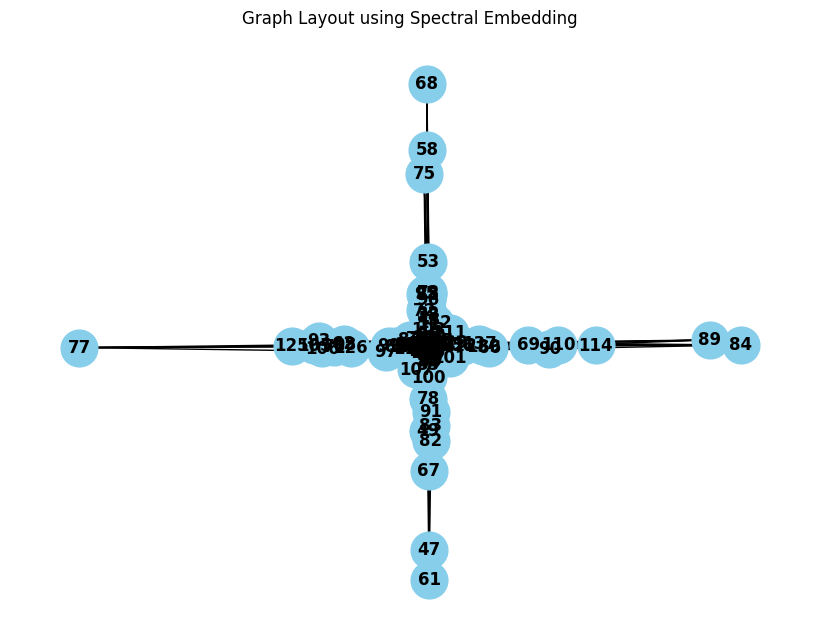

Calculated Node Positions: {0: (np.float64(1.460451690054857e-06), np.float64(-0.00017611992735596405)), 1: (np.float64(-1.1420569750727346e-06), np.float64(2.9793400640314616e-05)), 2: (np.float64(-7.926498701911335e-07), np.float64(1.689571504323497e-06)), 3: (np.float64(-7.701886017857403e-07), np.float64(-0.0001745240380894124)), 4: (np.float64(1.7546752173774638e-06), np.float64(-7.873746637136053e-07)), 5: (np.float64(-9.9378970257961e-06), np.float64(0.00142364805482402)), 6: (np.float64(-6.668197198774601e-06), np.float64(1.295193901199032e-06)), 7: (np.float64(9.450767288244157e-06), np.float64(-4.921477662038487e-05)), 8: (np.float64(-1.2331670737609091e-05), np.float64(0.0006237703714751242)), 9: (np.float64(-2.0117308888090504e-05), np.float64(0.0030836934332534593)), 10: (np.float64(3.253063456185642e-05), np.float64(-0.0038428000530450757)), 11: (np.float64(8.83954538910027e-06), np.float64(-1.4316053834506626e-05)), 12: (np.float64(2.6819063782903413e-05), np.float64(0.0

In [50]:
G = nx.from_numpy_array(adj_matrix)

plt.figure(figsize=(8, 6))
nx.draw(G, 
        pos=node_positions, 
        with_labels=True, 
        node_color='skyblue', 
        node_size=700,
        font_size=12, 
        font_weight='bold')
plt.title("Graph Layout using Spectral Embedding")
plt.show()

print("Calculated Node Positions:", node_positions)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (195,) + inhomogeneous part.

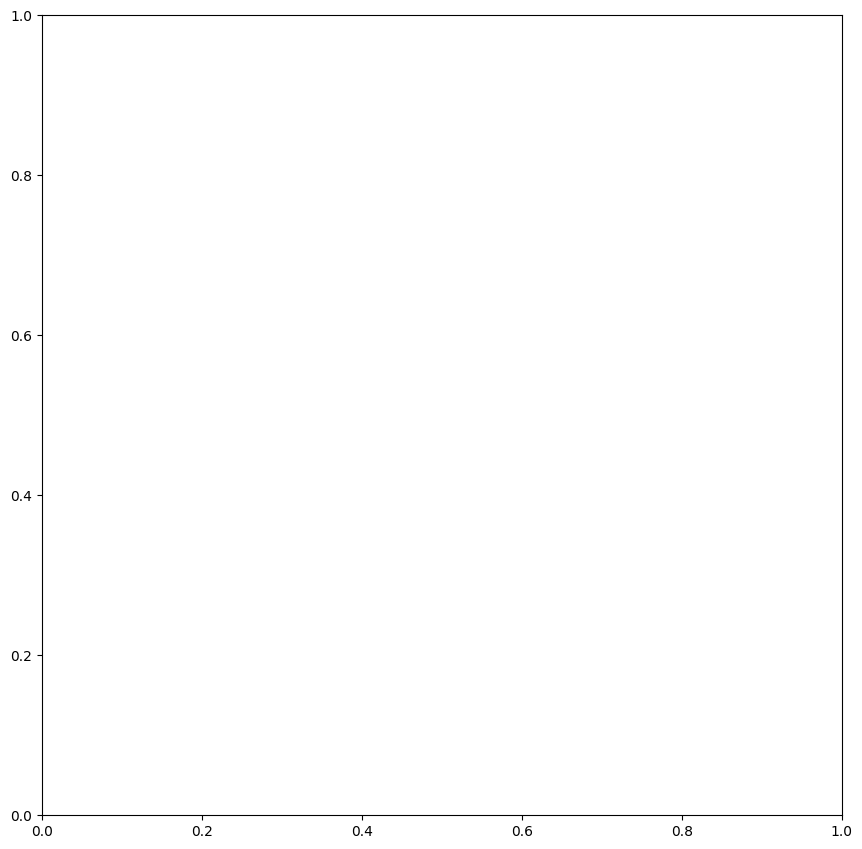

In [49]:

# Graph the adjacency matrix
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_numpy_array(adj_matrix)
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=20, pos=vertices, with_labels=False)

In [ ]:
# Get adjacency matrices from Box drive

adj_mat_dictionary = {}

adj_mat_dictionary['adj_mat_1'] = np.loadtxt('C:/Users/steph/Box/Calcium_Imaging_Data/Graph_Representations/adj_mat_1.txt', delimiter=',')